In [45]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import time
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import random
import pylab
from scipy import optimize


In [16]:
df = pd.read_csv('df_3.csv')
pace_per_k = df['pace_per_k']
pace_per_k2 = pace_per_k[~np.isnan(pace_per_k)]

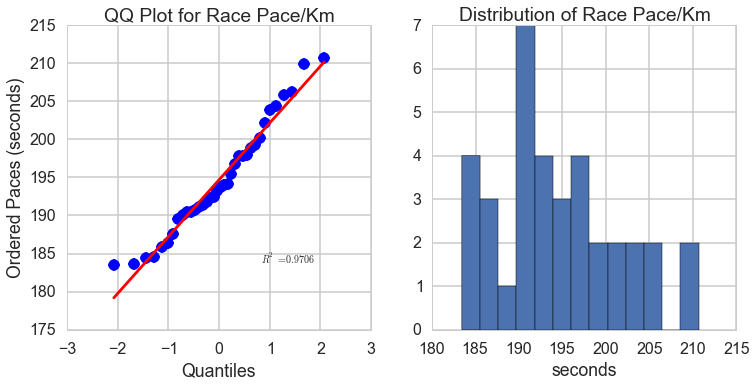

In [65]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(221)
stats.probplot(pace_per_k2, dist="norm", plot=ax)
ax.set_title("QQ Plot for Race Pace/Km")
ax.set_ylabel("Ordered Paces (seconds)")

ax2 = fig.add_subplot(222)
ax2.hist(pace_per_k2, 13)
ax2.set_title("Distribution of Race Pace/Km")
ax2.set_xlabel("seconds")


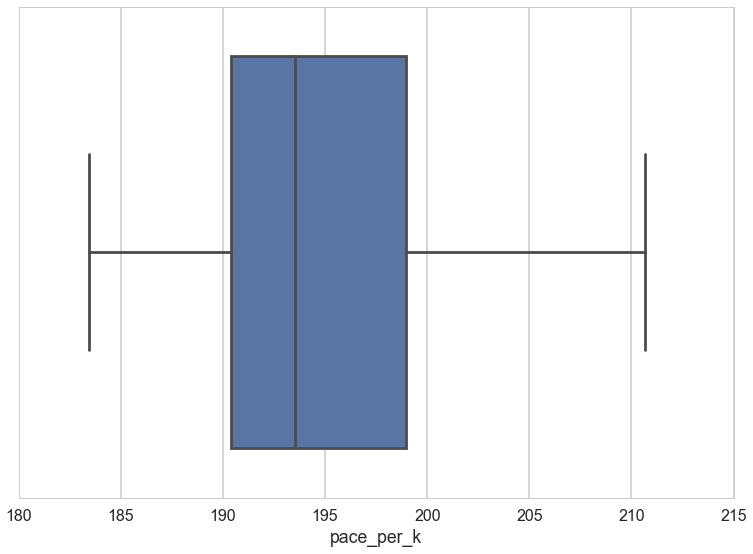

In [52]:
sns.boxplot(pace_per_k2)